# Model building.

- As we have cleaned the dataset by performing various methods, we will use cleaned data for our model building.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_df.csv')
df.head()

,Unnamed: 0,Area_Service,Age,Gender,Cultural_group,ethnicity,Admission_type,"Home or self care,",ccs_procedure_code,Code_illness,Mortality risk,Surg_Description,Weight_baby,Emergency dept_yes/No,Tot_charg,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
0,0,1.637674,-0.362298,-0.877428,0.54323,-0.309779,1.130301,-0.436518,-1.109238,-1.163316,-0.768165,-0.55329,-0.29531,0.869407,-0.397201,0.683746,-1.24089,1
1,1,1.637674,1.108114,-0.877428,0.54323,-0.309779,0.183965,2.179808,-1.109238,1.022065,0.241863,-0.55329,-0.29531,0.869407,-0.410217,0.764927,-1.24089,1
2,2,1.637674,-0.362298,-0.877428,0.54323,-0.309779,0.183965,-0.436518,-1.109238,-1.163316,-0.768165,-0.55329,-0.29531,0.869407,-0.427257,0.740553,-1.24089,1
3,3,1.637674,-1.832710,-0.877428,0.54323,-0.309779,0.183965,-0.436518,-1.109238,-1.163316,-0.768165,-0.55329,-0.29531,0.869407,-0.475856,1.258595,-1.24089,0
4,4,1.637674,1.108114,-0.877428,0.54323,-0.309779,1.130301,-0.436518,-1.109238,-0.070625,1.251890,-0.55329,-0.29531,0.869407,-0.434598,0.651262,-1.24089,1


In [3]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

**Train Test split**

In [4]:
x = df.drop(columns=['Result'])
y = df['Result']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Model building and trying out various algorithm.

# **1. DECISION TREE**

In [7]:
dt_model = DecisionTreeClassifier()

In [8]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10}
0.5034501340900193


In [9]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dt_pred_train = dt_model.predict(x_train)
print("Accuracy score for the training data:" , accuracy_score(y_train, dt_pred_train))
dt_pred_test = dt_model.predict(x_test)
print("Accuracy score for the testing data:" , accuracy_score(y_test, dt_pred_test))

Accuracy score for the training data: 0.5065411511112421
Accuracy score for the testing data: 0.50355159324911


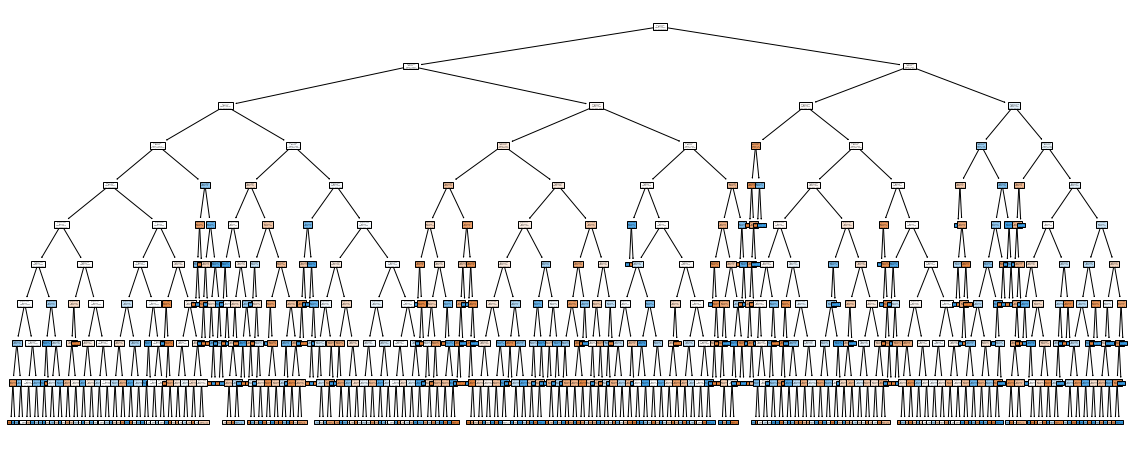

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize =(20,8))
plot_tree(decision_tree = dt_model, filled = True)
plt.show()

# 2. Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=2, random_state=40)
model.fit(x,y)

RandomForestClassifier(n_jobs=2, random_state=40)

In [18]:
rf_pred_train= model.predict(x_train)
print("Accuracy of training model",accuracy_score(y_train,rf_pred_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,rf_pred_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,rf_pred_train))

Accuracy of training model 0.9986325765070918
Confusion Matrics [[593565    158]
 [  1466 592446]]
Classificaton Report                precision    recall  f1-score   support

           0       1.00      1.00      1.00    593723
           1       1.00      1.00      1.00    593912

    accuracy                           1.00   1187635
   macro avg       1.00      1.00      1.00   1187635
weighted avg       1.00      1.00      1.00   1187635



In [19]:
rf_pred_test= model.predict(x_test)

In [20]:
print("Accuracy of testing model",accuracy_score(y_test,rf_pred_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,rf_pred_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,rf_pred_test))

Accuracy of testing model 0.9985618489166714
Confusion Matrics [[148513     36]
 [   391 147969]]
Classificaton Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    148549
           1       1.00      1.00      1.00    148360

    accuracy                           1.00    296909
   macro avg       1.00      1.00      1.00    296909
weighted avg       1.00      1.00      1.00    296909



In [21]:
# from sklearn.model_selection import RandomizedSearchCV
# rf = RandomForestClassifier()
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

NameError: name 'R' is not defined

# 3. Logistic Regression

In [22]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
lr_pred_train=lr.predict(x_train)
print("Accuracy of training model",accuracy_score(y_train,lr_pred_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,lr_pred_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,lr_pred_train))

Accuracy of training model 0.5030392334345148
Confusion Matrics [[258502 335221]
 [254987 338925]]
Classificaton Report                precision    recall  f1-score   support

           0       0.50      0.44      0.47    593723
           1       0.50      0.57      0.53    593912

    accuracy                           0.50   1187635
   macro avg       0.50      0.50      0.50   1187635
weighted avg       0.50      0.50      0.50   1187635



In [24]:
lr_pred_test= lr.predict(x_test)
print("Accuracy of testing model",accuracy_score(y_test,lr_pred_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,lr_pred_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,lr_pred_test))

Accuracy of testing model 0.5007729641068476
Confusion Matrics [[64267 84282]
 [63943 84417]]
Classificaton Report               precision    recall  f1-score   support

           0       0.50      0.43      0.46    148549
           1       0.50      0.57      0.53    148360

    accuracy                           0.50    296909
   macro avg       0.50      0.50      0.50    296909
weighted avg       0.50      0.50      0.50    296909



# 4. AdaBoost

In [25]:
adb_classifier=AdaBoostClassifier(base_estimator=None)
adb_classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [26]:
ab_pred_train = adb_classifier.predict(x_train)
print("Accuracy of training model",accuracy_score(y_train,ab_pred_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,ab_pred_train))
print("==============================================================================")
print("Classification Report ",classification_report(y_train,ab_pred_train))

Accuracy of training model 0.5049758553764414
Confusion Matrics [[275936 317787]
 [270121 323791]]
Classification Report                precision    recall  f1-score   support

           0       0.51      0.46      0.48    593723
           1       0.50      0.55      0.52    593912

    accuracy                           0.50   1187635
   macro avg       0.51      0.50      0.50   1187635
weighted avg       0.51      0.50      0.50   1187635



In [27]:
ab_pred_test = adb_classifier.predict(x_test)
print("Accuracy of testing model",accuracy_score(y_test,ab_pred_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,ab_pred_test))
print("==============================================================================")
print("Classification Report",classification_report(y_test,ab_pred_test))

Accuracy of testing model 0.5023626767797541
Confusion Matrics [[68700 79849]
 [67904 80456]]
Classification Report               precision    recall  f1-score   support

           0       0.50      0.46      0.48    148549
           1       0.50      0.54      0.52    148360

    accuracy                           0.50    296909
   macro avg       0.50      0.50      0.50    296909
weighted avg       0.50      0.50      0.50    296909



# 5. Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [31]:
gb_pred_train = gb.predict(x_train)
print("Accuracy of training model",accuracy_score(y_train,gb_pred_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,gb_pred_train))
print("==============================================================================")
print("Classification Report ",classification_report(y_train,gb_pred_train))

Accuracy of training model 0.5095572292834077
Confusion Matrics [[243217 350506]
 [231961 361951]]
Classification Report                precision    recall  f1-score   support

           0       0.51      0.41      0.46    593723
           1       0.51      0.61      0.55    593912

    accuracy                           0.51   1187635
   macro avg       0.51      0.51      0.50   1187635
weighted avg       0.51      0.51      0.50   1187635



In [32]:
gb_pred_test = gb.predict(x_test)
print("Accuracy of testing model",accuracy_score(y_test,gb_pred_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,gb_pred_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,gb_pred_test))

Accuracy of testing model 0.5054073807126089
Confusion Matrics [[60166 88383]
 [58466 89894]]
Classificaton Report               precision    recall  f1-score   support

           0       0.51      0.41      0.45    148549
           1       0.50      0.61      0.55    148360

    accuracy                           0.51    296909
   macro avg       0.51      0.51      0.50    296909
weighted avg       0.51      0.51      0.50    296909



In [33]:
final_model = pd.DataFrame({
    'Model' : ['Decision Tree','Random Forest','Logistic Regression','AdaBoost','Gradient Boosting'],
    'Training Accuracy' : [accuracy_score(y_train,dt_pred_train),accuracy_score(y_train,rf_pred_train),accuracy_score(y_train,lr_pred_train),
                          accuracy_score(y_train,ab_pred_train),accuracy_score(y_train,gb_pred_train)],
    'Testing Accuracy' : [accuracy_score(y_test, dt_pred_test),accuracy_score(y_test,rf_pred_test),accuracy_score(y_test,lr_pred_test),
                       accuracy_score(y_test,ab_pred_test),accuracy_score(y_test,gb_pred_test)]
})

final_model

,Model,Training Accuracy,Testing Accuracy
0,Decision Tree,0.506541,0.503552
1,Random Forest,0.998633,0.998562
2,Logistic Regression,0.503039,0.500773
3,AdaBoost,0.504976,0.502363
4,Gradient Boosting,0.509557,0.505407


# Conclusion

- As we can see above, the Random forest algorithm is giving the best accuarcy amoung all of the models.
- There is no problem of overfitting also so we will use random forest model for predcition.